## A Simple Recommender System using Pandas 
In this part of the exercise you are going to work with a real data set, i.e. the **Movie Lens Data** from https://grouplens.org/datasets/movielens/. This is a **collection of movie ratings** which are widely used in research projects about recommender systems. 

As in any Data Science project, **we start with the data exploration task** to get familiar with the data and look for hidden patterns. Afterwards, we **build a simple movie recommender system** without using any fancy machine learning algorithms. Keep in mind that this will not be a robust recommender sytem, but it is a nice first start to get used to pandas.

So, let's start loading needed packages:

In [8]:
# import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Next, please load two csv files **'../data/ml-latest-small/ratings.csv'** and **'data/ml-latest-small/movies.csv'** as DataFrames named ratings and movies.

**Hint**: Use pd.read_csv().

In [11]:
# import the data
ratings = <FILL-IN>
<FILL-IN> = <FILL-IN>('../data/ml-latest-small/movies.csv')

In [12]:
# solution
# import the data
ratings = pd.read_csv('../data/ml-latest-small/ratings.csv')
movies = pd.read_csv('../data/ml-latest-small/movies.csv')

Investigate the DataFrames and answer the following questions:
- how much memory is used for the DataFrames?
- what kind of columns do we have (name and datatype)?
- how many records hold the DataFrames?

In [13]:
# solution
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
userId       100004 non-null int64
movieId      100004 non-null int64
rating       100004 non-null float64
timestamp    100004 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
# solution
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
movieId    9125 non-null int64
title      9125 non-null object
genres     9125 non-null object
dtypes: int64(1), object(2)
memory usage: 213.9+ KB


**Merge** the two DataFrames **ratings** and **movies on the key movieId** and select the **columns rating, userId and title**. Give the resulting DataFrame the name df. Afterwards, print the first 5 rows of the DataFrame.

In [ ]:
# merge
df = <FILL-IN>
<FILL-IN>.head()

In [15]:
#df.select_dtypes().columns.tolist()

In [15]:
# Solution
#df = ratings.merge(movies, on='movieId')[['userId', 'title', 'rating']]
df = pd.merge(movies, ratings, on='movieId')
#[['rating', 'userId', 'title']]
df = df.loc[:,['rating', 'userId', 'title']]
df.head()

,rating,userId,title
0,3.0,7,Toy Story (1995)
1,4.0,9,Toy Story (1995)
2,5.0,13,Toy Story (1995)
3,2.0,15,Toy Story (1995)
4,3.0,19,Toy Story (1995)


**Compute** the mean, median and count of the ratings per movie.

Hint: Extract the two needed columns *title* and *rating* and use the groupby('column') method. Try to produce the same DataFrame as below. For the following tasks it is important that you get the same result as below, i.e. same structure and column names.

In [ ]:
# mean, median and count
df_agg = <FILL-IN>.agg(['mean', <FILL-IN>, 'count'])
df_agg.head()

In [17]:
# solution
# modify
df_agg = df[['title', 'rating']].groupby('title').agg(['mean', 'median', 'count'])
df_agg = df.groupby('title').agg({'rating': ['count', np.mean, np.median]})
df_agg.head()

rating                 
                                         count      mean median
title                                                          
"Great Performances" Cats (1998)             2  1.750000   1.75
$9.99 (2008)                                 3  3.833333   4.50
'Hellboy': The Seeds of Creation (2004)      1  2.000000   2.00
'Neath the Arizona Skies (1934)              1  0.500000   0.50
'Round Midnight (1986)                       2  2.250000   2.25

Extract only movies of the dataframe df_agg which have been rated **more than 100 times** and sort the resulting dataset in **descending order with respect to the mean rating**. Name the resulting dataframe df_agg_100 and show the first 20 and the last 20 rows.

Hint: Use conditional indexing and the sort_values() method. Furthermore, you can use head and tail.

In [18]:
df_agg_100 = df_agg[df_agg[('rating', 'count')] > 100].sort_values([('rating', 'mean')], ascending=False)
#.<FILL-IN>(
#    [('rating', 'mean')], ascending=<FILL-IN>)
#<FILL-IN>
df_agg_100.head(20)

rating                 
                                                    count      mean median
title                                                                     
Godfather, The (1972)                                 200  4.487500   5.00
Shawshank Redemption, The (1994)                      311  4.487138   5.00
Godfather: Part II, The (1974)                        135  4.385185   5.00
Usual Suspects, The (1995)                            201  4.370647   4.50
Schindler's List (1993)                               244  4.303279   4.50
One Flew Over the Cuckoo's Nest (1975)                144  4.256944   4.50
Fargo (1996)                                          224  4.256696   4.50
Pulp Fiction (1994)                                   324  4.256173   4.50
American Beauty (1999)                                220  4.236364   4.25
Dark Knight, The (2008)                               121  4.235537   4.50
Casablanca (1942)                                     117  4.235043   4.50
Star Wars: Episode V - The Empire Strikes Back ...    234  4.232906   4.50
Memento (2000)                                        132  4.227273   4.50
Taxi Driver (1976)                                    118  4.224576   4.25
Monty Python and the Holy Grail (1975)                145  4.224138   4.50
Star Wars: Episode IV - A New Hope (1977)             291  4.221649   4.50
Dr. Strangelove or: How I Learned to Stop Worry...    105  4.209524   4.50
Princess Bride, The (1987)                            163  4.208589   4.00
Goodfellas (1990)                                     131  4.202290   4.00
Raiders of the Lost Ark (Indiana Jones and the ...    220  4.193182   4.00

In [ ]:
<FILL-IN> = df_agg[df_agg[('rating', <FILL-IN>)] > <FILL-IN>].<FILL-IN>(
    [('rating', 'mean')], ascending=<FILL-IN>)
<FILL-IN>

In [19]:
# Solution
df_agg_100 = df_agg[df_agg[('rating','count')] > 100]\
    .sort_values([('rating', 'mean')], ascending=False)
df_agg_100.head(20)

rating                 
                                                    count      mean median
title                                                                     
Godfather, The (1972)                                 200  4.487500   5.00
Shawshank Redemption, The (1994)                      311  4.487138   5.00
Godfather: Part II, The (1974)                        135  4.385185   5.00
Usual Suspects, The (1995)                            201  4.370647   4.50
Schindler's List (1993)                               244  4.303279   4.50
One Flew Over the Cuckoo's Nest (1975)                144  4.256944   4.50
Fargo (1996)                                          224  4.256696   4.50
Pulp Fiction (1994)                                   324  4.256173   4.50
American Beauty (1999)                                220  4.236364   4.25
Dark Knight, The (2008)                               121  4.235537   4.50
Casablanca (1942)                                     117  4.235043   4.50
Star Wars: Episode V - The Empire Strikes Back ...    234  4.232906   4.50
Memento (2000)                                        132  4.227273   4.50
Taxi Driver (1976)                                    118  4.224576   4.25
Monty Python and the Holy Grail (1975)                145  4.224138   4.50
Star Wars: Episode IV - A New Hope (1977)             291  4.221649   4.50
Dr. Strangelove or: How I Learned to Stop Worry...    105  4.209524   4.50
Princess Bride, The (1987)                            163  4.208589   4.00
Goodfellas (1990)                                     131  4.202290   4.00
Raiders of the Lost Ark (Indiana Jones and the ...    220  4.193182   4.00

In [126]:
# solution
<FILL-IN>tail(20)

rating             
                                                      mean median count
title                                                                  
Stargate (1994)                                   3.368966    3.0   145
Pretty Woman (1990)                               3.360544    3.0   147
Star Trek: Generations (1994)                     3.350877    3.0   114
Natural Born Killers (1994)                       3.336449    3.0   107
Titanic (1997)                                    3.332317    3.5   164
Ghost (1990)                                      3.325397    3.0   126
Outbreak (1995)                                   3.309091    3.0   110
American Pie (1999)                               3.297297    3.5   111
Austin Powers: The Spy Who Shagged Me (1999)      3.272321    3.5   112
Twister (1996)                                    3.250000    3.0   150
Star Wars: Episode I - The Phantom Menace (1999)  3.199275    3.0   138
Home Alone (1990)                                 3.112403    3.0   129
Dumb & Dumber (Dumb and Dumber) (1994)            3.110759    3.0   158
Net, The (1995)                                   3.102941    3.0   102
Cliffhanger (1993)                                3.084906    3.0   106
Mask, The (1994)                                  3.070064    3.0   157
Armageddon (1998)                                 3.044248    3.0   113
Ace Ventura: Pet Detective (1994)                 2.871429    3.0   175
Batman Forever (1995)                             2.782946    3.0   129
Waterworld (1995)                                 2.752212    3.0   113

 We have not talked much about plotting yet. Making plots is one of the key ingredients to explore data sets. There will be another exercise which will cover this topic. However, we want to visualize the mean rating vs. the number of votings. Therefore, **please execute the commands below** and set the arguments **kind to 'scatter'** and **alpha to 0.3** to produce a scatter plot with a certain transparency level.

In [ ]:
# create figure and axes object
fig, ax = plt.subplots(figsize=(12,8))
# use Pandas built-in Plotting Function
df_agg['rating'].plot(kind=<FILL-IN>, x='mean', y='count', alpha=<FILL-IN>, ax=ax)

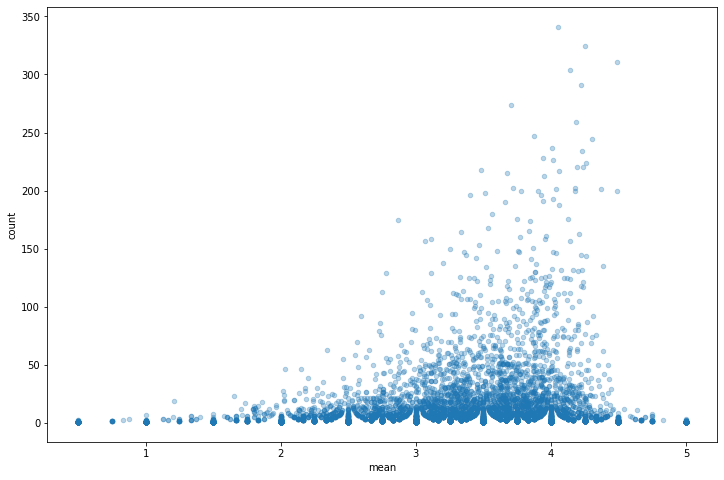

In [20]:
# solution
# create figure and axes object
fig, ax = plt.subplots(figsize=(12,8))
# use Pandas built-in Plotting Function
df_agg['rating'].plot(kind='scatter', x='mean', y='count', alpha=0.3, ax=ax)

Can you interpret the plot? Does it make sense? Do you see any kind of **correlation or pattern**?

Which movie got the **worst mean rating** out of the df_agg_100 DataFrame?

Hint: Use idxmin().

In [ ]:
# worst movie
df_agg_100.<FILL-IN>

In [21]:
# solution
# wich movie got the worst rating out of the df_agg_100 dataframe?
df_agg_100.idxmin()
#df_agg_100.min()

rating  count     Shining, The (1980)
        mean        Waterworld (1995)
        median       Firm, The (1993)
dtype: object

Next, we want to create a so called **feature matix**, where the **columns** are the **movie titles**, the **row indices** are the **userIds** and the **values** are the corresponding **ratings**. Therefore, you can use the **pivot_table** method on the dataframe df. Try to figure it out by your own.

Hint: Use the Shortcut *Shift+Tab* to get the docstring of the function. Name the resulting DataFrame **feature_mat**.
Afterwards, show the first 10 entries of the matrix.

In [ ]:
<FILL-IN> = df.<FILL-IN>
<FILL-IN>

In [22]:
# solution
feature_mat = df.pivot_table(values='rating', index='userId', columns='title')
feature_mat.head(10)

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Wow, there are so many NaNs. Could this be correct? Can you explain why we get so many NaNs?

Such a matrix is called a **sparse matrix**. Actually, there are better formats to store elements of such a matrix more efficiently. Those who are interested may have a look at the **Compressed Sparse Column (CSC) format**.

Now, please compute the **percentage of null values** of the feature matrix.

Hint: Use the methods .isnull() and .sum() and the class attribute size which gives you the number of element of the matrix.

In [23]:
nulls = feature_mat.isnull().sum().sum()

In [27]:
#feature_mat.count().sum()

In [ ]:
# percentage of null values
nulls = feature_mat.<FILL-IN>
nulls / <FILL-IN>.<FILL-IN> * 100

In [24]:
# Solution
nulls = feature_mat.isnull().sum().sum()
nulls / feature_mat.size * 100

98.35573954643449

## Recommender System
There are many different ways to build a recommender system. One popular approach is to use **collaborative filtering**, which is just a fancy name for recommending stuff based on the combination what you did (e.g. bought) and what everybody else did (e.g. bought).

We want to discuss two approaches:

1. Find similar users based on correlations between their ratings. If e.g. user A and B are highly correlated, recommend a highly rated movie by user A to user B (if he has not seen that movie yet). This approach is called **user based collaborative filtering**.

2. Find similar items based on correlations between their rating patterns. Afterwards, recommend similar movies which the user has not seen yet.

Both approaches are very similar, but we choose  a slightly modified version of method 2. What are the **drawbacks of method 1**?

In [64]:
# solution
# 1. people are frickle, tastes change over time 
# (weird scifi phase in the past, and then romcom...)
# ..the edgy guy now gets romcoms, not so good
# 2. less items then users (computational better);
# users can leave the system, items stay
# 3. people do bad things: Like a lot of popular movies and 
# then only your own item, to get more attractions 

Compute the **correlation matrix** with the **method corr()** and name the resulting DataFrame **movie_corr**.
This may take a while. You can **measure the time** with the magic function **%%time.**

In [ ]:
%%<FILL-IN>
<FILL-IN> = <FILL-IN>.<FILL-IN>

In [25]:
%%time
# solution
movie_corr = feature_mat.corr()

CPU times: user 46 s, sys: 109 ms, total: 46.1 s
Wall time: 46.1 s


In [31]:
#movie_corr

Use this correlation matrix to **find which movies are highly correlated with the movie Toy Story**.

Hint: Look at the DataFrame with the .head() method. After you have discovered the structure of the dataframe try to **extract the column 'Toy Story (1995)'**. The result will be a **Pandas Series** containing the correlation coefficients of Toy Story with all the other movies. Sort the series in descending order and print the first 10 records.

In [ ]:
movie_corr[<FILL-IN>].sort_values(<FILL-IN>).head(<FILL-IN>)

In [26]:
# solution
movie_corr['Toy Story (1995)'].sort_values(ascending=False).head(10)

title
Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979)    1.0
Neighbors 2: Sorority Rising (2016)                                 1.0
Twin Falls Idaho (1999)                                             1.0
Rome, Open City (a.k.a. Open City) (Roma, città aperta) (1945)      1.0
Flyboys (2006)                                                      1.0
Glass Bottom Boat, The (1966)                                       1.0
Hereafter (2010)                                                    1.0
D.O.A. (1988)                                                       1.0
Cabin Fever (2002)                                                  1.0
No Small Affair (1984)                                              1.0
Name: Toy Story (1995), dtype: float64

Do you know any of these movies? What happened? Did we do **something wrong**? Can you **explain the result**?

**Compute the correlation matrix again**, but this time for movies wich lead to **at least 100 *observation pairs***, i.e. the movie Toy Story and another movie has been rated at least by the same 100 users. In the following table you can see an example for two *observation pairs* of Toy Story and MovieA, and one *observation pair* for movie Toy Story and MovieB.

| userId        | ToyStory           | MovieA  | MovieB
| ------------- |:-------------:| -----:|
| 1      | 3.0 | 4.0 | 4.0
| 2      | NaN    |   5.0 | 4.0
| 3 | 4.0      |    NaN | NaN
| 4 | 5.0      |    4.0 | NaN


Afterwards, check again which movies are highly correlated wth Toy Story.

Hint: Use the argument **min_periods** of the corr() method to achieve the desired result.

In [ ]:
movie_corr_100 = <FILL-IN>
movie_corr_100<FILL-IN>.head(10)

In [27]:
# solution
movie_corr_100 = feature_mat.corr(min_periods=100)
movie_corr_100['Toy Story (1995)'].sort_values(ascending=False).head(10)

title
Toy Story (1995)                                                                  1.000000
Toy Story 2 (1999)                                                                0.743352
Lion King, The (1994)                                                             0.517524
Shrek (2001)                                                                      0.487464
Aladdin (1992)                                                                    0.461749
Willy Wonka & the Chocolate Factory (1971)                                        0.443061
Beauty and the Beast (1991)                                                       0.392724
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.383092
Groundhog Day (1993)                                                              0.374295
Jurassic Park (1993)                                                              0.356942
Name: Toy Story (1995), dtype: float64

Next, we create a dictionary which contains **your own movie preferences**. Please add your own ratings (integers 1 to 5).

In [124]:
# please add your ratings as values
myRatings = {'Dark Knight, The (2008)': <FILL-IN>,
             'Mask, The (1994)': <FILL-IN>,
             'Titanic (1997)': <FILL-IN>,
             'Star Wars: Episode IV - A New Hope (1977)': <FILL-IN>,
            'Star Wars: Episode I - The Phantom Menace (1999)': <FILL-IN>,
             'Pulp Fiction (1994)': <FILL-IN>}

In [28]:
# solution
myRatings = {'Jurassic Park (1993)': 1,
             'Mask, The (1994)': 2,
             'Titanic (1997)': 2,
             'Star Wars: Episode IV - A New Hope (1977)': 2,
            'Star Wars: Episode I - The Phantom Menace (1999)': 5,
             'Pulp Fiction (1994)': 4}

The function below **weights the similiraty score** by your ratings and **returns a sorted pandas Series** containing your recommendations in descending order. Please execute the function definition.

In [29]:
def recommend(ratings):
    '''Find the movies which are highly correlated with 
    your rated movies and weight them with your rating.'''

    recommendations = pd.Series()
    
    for key in myRatings:
        candidates = movie_corr_100[key].dropna()
        candidates = candidates.apply(lambda x: x * myRatings[key])
        recommendations = recommendations.append(candidates)

    recommendations.drop(list(myRatings.keys()), inplace=True)
    
    # aggregation, because one movie can be similar to more than one other movie
    return recommendations.groupby(by=recommendations.index).agg('mean')\
        .sort_values(ascending=False)

Use the function **recommend** on your own dictionary **myRatings** and name the result myRecommendations.

In [ ]:
myRecommendations = <FILL-IN>

In [30]:
# solution
myRecommendations = recommend(myRatings)
myRecommendations.head()

Reservoir Dogs (1992)                                    1.625913
Goodfellas (1990)                                        1.307333
Star Wars: Episode VI - Return of the Jedi (1983)        1.205585
Star Wars: Episode V - The Empire Strikes Back (1980)    1.085845
E.T. the Extra-Terrestrial (1982)                        0.932273
dtype: float64

Finally, we **join the series** with the **df_agg_100 dataframe** to add some summary statistics. Since we can only join two dataframes, we have to **convert the series to a DataFrame** by using the method to_frame(name='column_name') on our pandas series myRecommendations.

In [ ]:
<FILL-IN>.to_frame(name='score').join(df_agg_100['rating']).dropna().head(10)

In [31]:
# solution
myRecommendations.to_frame(name='score').join(df_agg_100['rating']).dropna().head(10)

,score,count,mean,median
Reservoir Dogs (1992),1.625913,132,4.162879,4.0
Goodfellas (1990),1.307333,131,4.202290,4.0
Star Wars: Episode VI - Return of the Jedi (1983),1.205585,217,4.059908,4.0
Star Wars: Episode V - The Empire Strikes Back (1980),1.085845,234,4.232906,4.5
E.T. the Extra-Terrestrial (1982),0.932273,160,3.768750,4.0
Léon: The Professional (a.k.a. The Professional) (Léon) (1994),0.907939,132,4.071970,4.0
Fargo (1996),0.772930,224,4.256696,4.5
Men in Black (a.k.a. MIB) (1997),0.724790,190,3.663158,4.0
Monty Python and the Holy Grail (1975),0.723781,145,4.224138,4.5
Babe (1995),0.707170,148,3.601351,4.0


### End of the Exercise
Great job! I hope you enjoyed the exercise.

## Bonus:
Start again with the movies and ratings DataFrames. Try to solve the following problems:

1. How many different movie genres holds the DataFrame movies?
2. Which movie genre has the highest average rating considering only movies with more than 100 ratings?

Hint: These two tasks can be a bit tricky. Here are some useful steps that I have used for my solution:

1. Transform the 'genres' column into a list using the apply and split method.
2. Explode (denormalize) the list. There are several ways to do that. One way is to use a nested for loop and iterate over a Pandas Series which contains the genres list. You could append each element of the genres_list to an empty list. Afterwards use the set(list) function to get only unique elements. As an alternative you could also use the method stack() on a Pandas Series. Unfortunately, there is no built-in explode function, e.g. like in Hive.

For question 2 you also need to do sth. like:

3. Perform sth. similar like in step 2 (see above), but keep track of the index to *rejoin* your results with the original DataFrame.
4. Join the result with the ratings df.
5. Compute the average rating and the count grouped by the exploded column genres.

In [32]:
# solution E1 (step1)
movies['genres_list'] = movies['genres'].apply(lambda x: x.split('|'))
movies.head()

,movieId,title,genres,genres_list
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [44]:
# Update: Now (Pandas 0.25) includes an explode method
movies["genres_list"].explode()

0         Adventure
0         Animation
0          Children
0            Comedy
0           Fantasy
           ...     
9121        Fantasy
9121         Sci-Fi
9122    Documentary
9123         Comedy
9124    Documentary
Name: genres_list, Length: 20340, dtype: object

In [33]:
# solution E1 A (step2)
genre_list = []
for row in movies['genres_list']:
    for element in row:
        genre_list.append(element)
genres_set = set(genre_list)
print(genres_set)
len(genres_set)

{'IMAX', 'Sci-Fi', 'Thriller', 'Western', 'Fantasy', 'Drama', 'Romance', 'Mystery', 'War', 'Film-Noir', 'Crime', 'Documentary', 'Comedy', 'Horror', 'Animation', 'Adventure', 'Children', 'Action', 'Musical', '(no genres listed)'}


20

In [34]:
# another solution
all_genres = [item for sublist in movies['genres_list'].tolist() for item in sublist]
set(all_genres)

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [35]:
%%time
# solution E1 A (step 2) 
rows = []
ind = 0
for row in movies['genres_list']:
    for element in row:
        rows.append([ind, element])
    ind += 1
temp_df = pd.DataFrame(data=rows, columns=['old_index', 'genres'])

CPU times: user 17.4 ms, sys: 32 µs, total: 17.4 ms
Wall time: 16.5 ms


In [36]:
temp_df.head()

,old_index,genres
0,0,Adventure
1,0,Animation
2,0,Children
3,0,Comedy
4,0,Fantasy


In [37]:
%%time
# solution E1 B (step 2)
exploded_df = movies['genres_list'].apply(lambda X_list: pd.Series(X_list)).stack().to_frame()
exploded_df.head(10)

CPU times: user 2.39 s, sys: 92.8 ms, total: 2.48 s
Wall time: 2.37 s


0
0 0  Adventure
  1  Animation
  2   Children
  3     Comedy
  4    Fantasy
1 0  Adventure
  1   Children
  2    Fantasy
2 0     Comedy
  1    Romance

In [38]:
exploded_df.head(10)

0
0 0  Adventure
  1  Animation
  2   Children
  3     Comedy
  4    Fantasy
1 0  Adventure
  1   Children
  2    Fantasy
2 0     Comedy
  1    Romance

In [39]:
# number of unique genres
#exploded_df.iloc[:,0].unique()
len(exploded_df.iloc[:,0].unique())

20

In [40]:
# solution E2 step2 with A
df_agg = temp_df.set_index('old_index').join(movies.drop(['genres'],axis=1))\
    .merge(ratings, on='movieId')\
    .groupby('genres').agg({'rating': [np.mean, np.median, 'count']})
df_agg.head()

rating              
                        mean median  count
genres                                    
(no genres listed)  3.777778    4.0     18
Action              3.445613    3.5  27056
Adventure           3.520393    4.0  22017
Animation           3.636062    4.0   6170
Children            3.466187    3.5   8680

In [41]:
# solution E2 step 3
df_agg[df_agg[('rating', 'count')] > 100].sort_values(by=('rating', 'mean'), ascending=False)

rating              
                 mean median  count
genres                             
Film-Noir    3.955702    4.0   1140
War          3.817214    4.0   5025
Documentary  3.813299    4.0   1564
Drama        3.681780    4.0  44752
Crime        3.679639    4.0  16266
Mystery      3.679541    4.0   7625
Animation    3.636062    4.0   6170
Musical      3.598793    4.0   4722
IMAX         3.571134    4.0   3156
Western      3.566423    4.0   1912
Romance      3.556165    4.0  19336
Adventure    3.520393    4.0  22017
Thriller     3.518502    3.5  25240
Fantasy      3.518063    4.0  10657
Children     3.466187    3.5   8680
Sci-Fi       3.460430    3.5  15365
Comedy       3.446037    3.5  38026
Action       3.445613    3.5  27056
Horror       3.315243    3.5   6790